In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import torch.nn as nn

In [2]:
device = torch.device('cpu')

In [3]:
num_epochs = 12
num_classes = 40
learning_rate = 0.001
batch_size=8

0 torch.Size([8, 3, 112, 92])
1 torch.Size([8, 3, 112, 92])
2 torch.Size([8, 3, 112, 92])
3 torch.Size([8, 3, 112, 92])


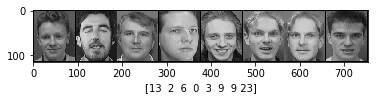

In [4]:
dataset = datasets.ImageFolder(root='faces/', transform=transforms.ToTensor())
train_loader = DataLoader(dataset, batch_size=batch_size,shuffle=True, num_workers=4)
for i, batch in enumerate(train_loader):
    print(i, batch[0].size())
    if i==3:
        grid=utils.make_grid(batch[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.xlabel(batch[1].numpy())
        plt.show()
        break

In [5]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=40):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(12, 12, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(12, 24, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(24, 24, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(24),
            nn.ReLU())
        self.fc = nn.Linear(56 * 46 * 24, out_features=num_classes)        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(-1, 56 * 46 * 24)
        out = self.fc(out)
        return out

In [6]:
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % batch_size == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/12], Step [8/40], Loss: 16.4653
Epoch [1/12], Step [16/40], Loss: 5.1200
Epoch [1/12], Step [24/40], Loss: 7.3679
Epoch [1/12], Step [32/40], Loss: 0.3124
Epoch [1/12], Step [40/40], Loss: 0.6834
Epoch [2/12], Step [8/40], Loss: 0.0002
Epoch [2/12], Step [16/40], Loss: 1.3265
Epoch [2/12], Step [24/40], Loss: 0.1548
Epoch [2/12], Step [32/40], Loss: 0.0222
Epoch [2/12], Step [40/40], Loss: 0.0048
Epoch [3/12], Step [8/40], Loss: 0.0008
Epoch [3/12], Step [16/40], Loss: 0.0045
Epoch [3/12], Step [24/40], Loss: 0.0001
Epoch [3/12], Step [32/40], Loss: 0.2854
Epoch [3/12], Step [40/40], Loss: 0.0963
Epoch [4/12], Step [8/40], Loss: 0.0000
Epoch [4/12], Step [16/40], Loss: 0.0000
Epoch [4/12], Step [24/40], Loss: 0.0008
Epoch [4/12], Step [32/40], Loss: 0.0001
Epoch [4/12], Step [40/40], Loss: 0.0000
Epoch [5/12], Step [8/40], Loss: 0.0000
Epoch [5/12], Step [16/40], Loss: 0.0003
Epoch [5/12], Step [24/40], Loss: 0.0004
Epoch [5/12], Step [32/40], Loss: 0.0002
Epoch [5/12], Step [

In [27]:
test_set = datasets.ImageFolder(root='test_faces/', transform=transforms.ToTensor() )
test_loader = DataLoader(test_set, batch_size=4,shuffle=True)

In [28]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Test accuracy of the model on the test set: {} %' .format(100*correct/total))

Test accuracy of the model on the test set: 93.75 %


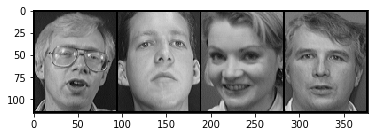

Labels: tensor([ 11,   0,  28,   6])
Predicted: tensor([ 11,   0,  28,   6])


In [29]:
grid=utils.make_grid(images)
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.show()
print('Labels:', labels) 
print('Predicted:', predicted)

In [31]:
batch=list(test_loader)
for i in range(len(test_loader)):
    image=batch[i][0]
    label=batch[i][1]
    image=image.to(device)
    label=label.to(device)
    output=model(image)
    _, predicted = torch.max(output.data, 1)
    print('{} P:'.format(i), predicted)
    print('{} L:'.format(i),label)

0 P: tensor([  6,  11,  39,  10])
0 L: tensor([  6,  11,  39,  10])
1 P: tensor([ 30,  29,  12,  27])
1 L: tensor([ 20,  29,  12,  27])
2 P: tensor([ 37,   3,   4,  27])
2 L: tensor([ 37,   3,   4,  27])
3 P: tensor([ 16,  23,  12,   5])
3 L: tensor([ 16,  23,   1,   5])
4 P: tensor([ 37,  36,  19,  23])
4 L: tensor([ 37,  36,  19,  23])
5 P: tensor([ 36,   1,  33,  39])
5 L: tensor([ 36,   1,  33,  39])
6 P: tensor([ 22,  34,   8,  28])
6 L: tensor([ 22,  34,   8,  28])
7 P: tensor([  7,  17,  24,  20])
7 L: tensor([  7,  17,  24,  20])
8 P: tensor([ 14,  35,   0,  30])
8 L: tensor([ 14,  34,  25,  30])
9 P: tensor([ 19,  13,   3,   0])
9 L: tensor([ 19,  13,   3,   0])
10 P: tensor([ 17,   8,   9,  32])
10 L: tensor([ 17,   8,   9,  32])
11 P: tensor([ 35,   0,  16,   7])
11 L: tensor([ 35,   0,  16,   7])
12 P: tensor([ 24,  33,  22,   6])
12 L: tensor([ 24,  33,  22,   6])
13 P: tensor([ 38,   9,  12,  25])
13 L: tensor([ 38,   9,  12,  25])
14 P: tensor([ 11,  30,   7,  15])
14 L:

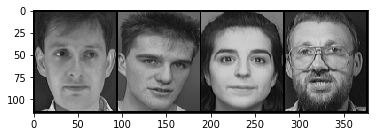

P: tensor([ 16,  23,  12,   5])
L: tensor([ 16,  23,   1,   5])


In [32]:
image=batch[3][0]
label=batch[3][1]
grid=utils.make_grid(image)
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.show()
image=image.to(device)
label=label.to(device)
output=model(image)
_, predicted = torch.max(output.data,1)
print('P:', predicted)
print('L:',label)

In [33]:
torch.save(model.state_dict(), 'model.ckpt')